In [3]:
import pandas as pd     # Library for manipulating data using DataFrames
import numpy as np      # Library used for handling arrays and utils such as min()  
import seaborn as sns   # Library for data visualisation

First, let us load the data. The return value of load_breast_cancer() is a python dictionary.

In [141]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_data.keys()

print(cancer_data['DESCR'])
# print("Data ===>", cancer_data['data'])
# print("Feature names ===>", cancer_data['feature_names'])
# print("target data= ===>", cancer_data['target'])
# print("target_names ===>", cancer_data['target_names'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Creating the pandas DataFrame using our data. But First concatenate the target column using numpy's "c_" function.

In [36]:
df = pd.DataFrame(np.c_[cancer_data['data'],cancer_data['target']],columns = np.append(cancer_data['feature_names'], ['target']))
df.shape

(569, 31)

The head() functions let's us take a look at the first few instances

In [ ]:
df.head()

# Exploratory Data Analysis

In [77]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


We will use the seaborn library to visualize our data. Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.


Check for null or missing values

In [142]:
df.isnull().any()
df.isna().any()
for column in df.columns:
    if (df[column].isnull().any()):
        print(column, "Contains null values")
    if (df[column].isna().any()):
        print(column, "Contains NaN values")

Let us check the balance of our data set.

<AxesSubplot:>

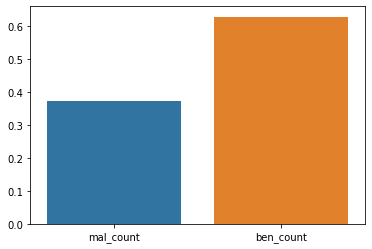

In [112]:
sum = df.shape[0]
mal_per = df.loc[df['target'] == 0].shape[0] / sum
ben_per = df.loc[df['target'] == 1].shape[0] / sum
sns.barplot(x=['mal_count', 'ben_count'], y = [mal_per, ben_per], label = "Count") 
# SNS doesn't have piechart

Since our data contains a lot of features, using a pairplot will show us the realtionship between a few pairs of features.

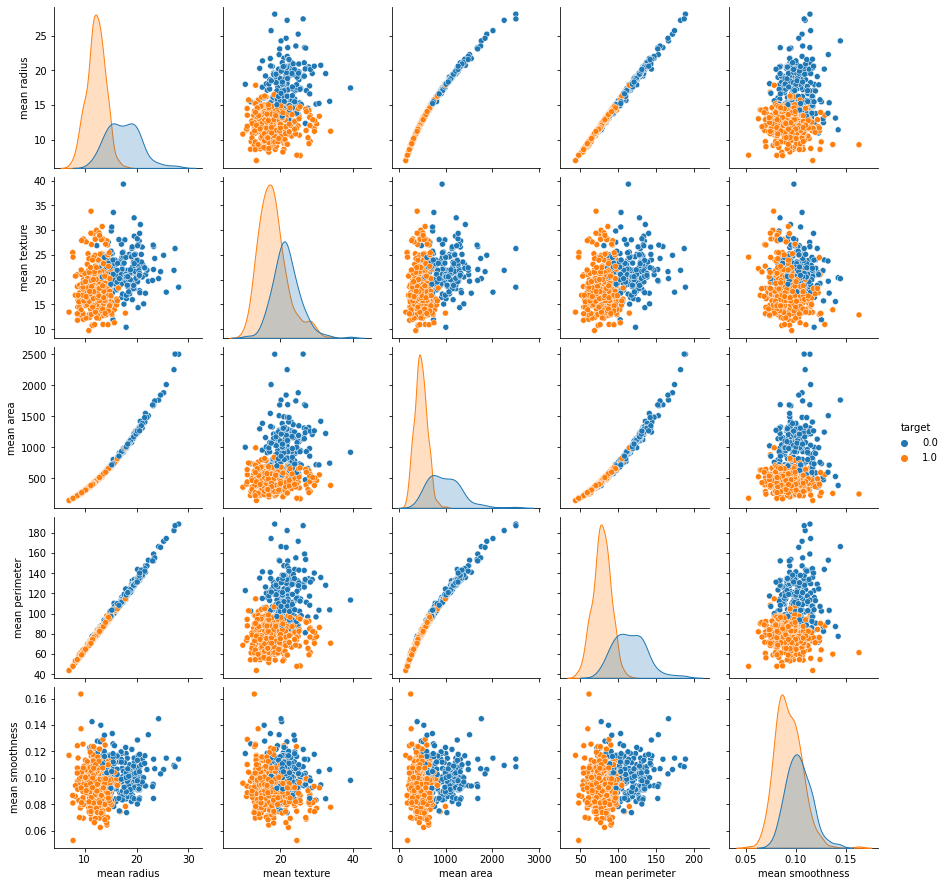

In [67]:
sns.pairplot(df, hue='target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

<AxesSubplot:>

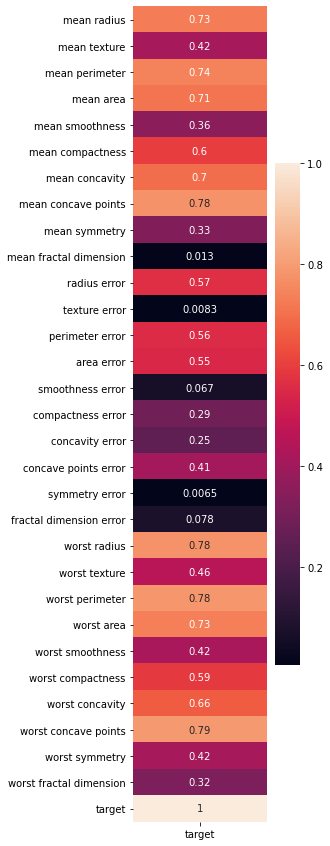

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,15)) 
sns.heatmap(df.corr()[['target']].abs(), annot=True) 


Train test split:


In [12]:
from sklearn.model_selection import train_test_split
cancer_data = df.drop("target",axis=1)
target = df["target"]
X_train, X_test, y_train, y_test = train_test_split(cancer_data,target, test_size = 0.2)

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score

sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
y_pred= sv.predict(X_test)

print("The accuracy score achieved using Linear SVM is: "+str(accuracy_score(y_pred,y_test)*100)+" %")

The accuracy score achieved using Linear SVM is: 96.49122807017544 %


In [14]:
y_pred

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.])

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

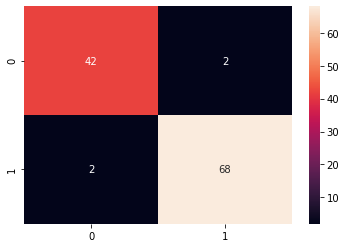

In [16]:
sns.heatmap(cm, annot=True)

In [18]:
from sklearn import preprocessing

norm_x_train= preprocessing.normalize(X_train)

In [19]:
norm_x_train

array([[1.51050512e-02, 1.54837914e-02, 9.86841066e-02, ...,
        1.01257312e-04, 3.41423170e-04, 9.10870233e-05],
       [1.95599358e-02, 3.72387573e-02, 1.26929555e-01, ...,
        1.57063910e-04, 4.75757542e-04, 1.58908498e-04],
       [1.29038090e-02, 1.18804586e-02, 8.33870680e-02, ...,
        9.02627036e-05, 2.22099017e-04, 5.60604143e-05],
       ...,
       [1.51752559e-02, 1.85427380e-02, 9.68690763e-02, ...,
        8.53850989e-05, 2.72312735e-04, 7.13323371e-05],
       [1.46467881e-02, 2.31454150e-02, 9.62459232e-02, ...,
        1.39796254e-04, 2.76923857e-04, 8.57150160e-05],
       [1.54793458e-02, 1.85434392e-02, 9.89702163e-02, ...,
        9.74381696e-05, 2.66235670e-04, 9.10716645e-05]])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

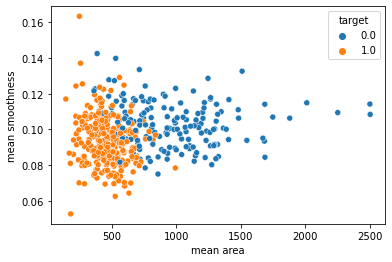

In [20]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)